# I. Importing required libraries

In [175]:
# importing numpy and panda
import numpy as np
import pandas as pd

# importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# importing library for EDA Analysis
from scipy.stats import zscore

# importing library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing library to split data
from sklearn.model_selection import train_test_split

# importing libraries for building models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

# importing library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

# importing library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

# importing libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

# II. making dataframe 

In [176]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


**-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors**

**-- Output: Number of predicted wins (W)**

### renaming the columns to make it more understandable

In [177]:


df.rename(columns={'W': 'Number of predicted wins',
                   'R': 'Runs',
                  'AB': 'At Bats',
                   'H': 'Hits',
                  '2B': '2nd baseman',
                  '3B': '3rd baseman',
                  'HR': 'Homeruns',
                  'BB': 'BB-Base on balls',
                  'SO': 'Strikeouts',
                  'SB': 'Stolen Bases',
                  'RA': 'Runs Allowed',
                  'ER': 'Earned Runs',
                 'ERA': 'Earned Run Average',
                  'CG': 'Complete Games',
                 'SHO': 'Shutouts',
                  'SV': 'Saves',
                   'E': 'Errors'},
          inplace=True, errors='raise')
df

,Number of predicted wins,Runs,At Bats,Hits,2nd baseman,3rd baseman,Homeruns,BB-Base on balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# III. EDA
## Getting insights about the dataset

In [178]:
df.shape

(30, 17)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number of predicted wins  30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   2nd baseman               30 non-null     int64  
 5   3rd baseman               30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   BB-Base on balls          30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average        30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

In [180]:
df.describe()

,Number of predicted wins,Runs,At Bats,Hits,2nd baseman,3rd baseman,Homeruns,BB-Base on balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### let's Check for unique values in the data 

In [181]:
df.nunique()

Number of predicted wins    24
Runs                        28
At Bats                     29
Hits                        29
2nd baseman                 22
3rd baseman                 23
Homeruns                    27
BB-Base on balls            29
Strikeouts                  29
Stolen Bases                27
Runs Allowed                30
Earned Runs                 30
Earned Run Average          30
Complete Games               9
Shutouts                    12
Saves                       20
Errors                      21
dtype: int64

## Handling Missing Values
### Checking for null values

In [182]:
print(df.isnull().sum())

Number of predicted wins    0
Runs                        0
At Bats                     0
Hits                        0
2nd baseman                 0
3rd baseman                 0
Homeruns                    0
BB-Base on balls            0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average          0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64


<AxesSubplot:>

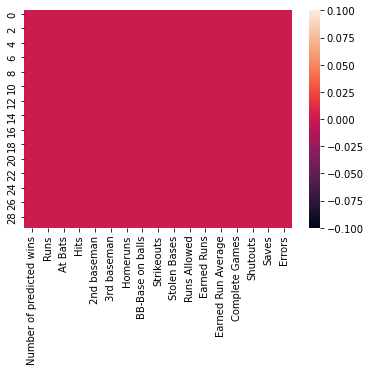

In [183]:
sns.heatmap(df.isnull())

**Observation :**
As we can see there are no Null values in the dataframe

###  Removing duplicate values from the dataframe

In [184]:
df.drop_duplicates(inplace=True)

# Analysis through Data visualization

In [206]:
X = df.drop(['Number of predicted wins'], axis = 1)
y = df['Number of predicted wins']

## A. Univariate analysis:

<AxesSubplot:xlabel='Runs', ylabel='Density'>

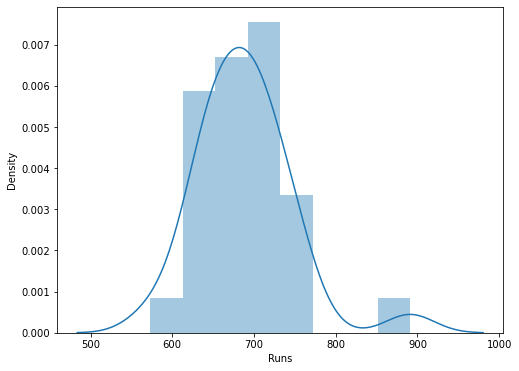

In [185]:
plt.figure(figsize=(8,6))
sns.distplot(df['Runs'])

<AxesSubplot:xlabel='At Bats', ylabel='Density'>

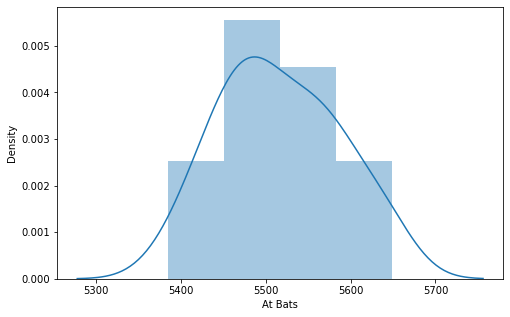

In [186]:
plt.figure(figsize=(8,5))
sns.distplot(df['At Bats'])

<AxesSubplot:xlabel='Hits', ylabel='Density'>

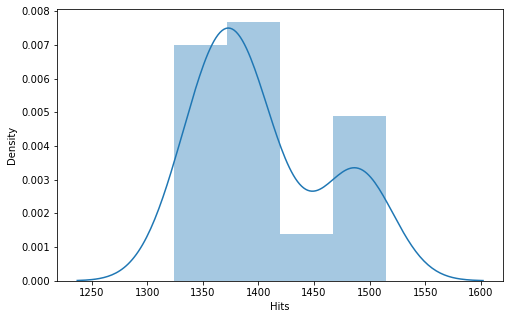

In [187]:
plt.figure(figsize=(8,5))
sns.distplot(df['Hits'])

<AxesSubplot:xlabel='2nd baseman', ylabel='Density'>

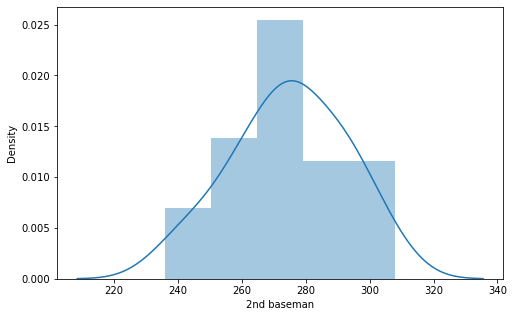

In [188]:
plt.figure(figsize=(8,5))
sns.distplot(df['2nd baseman'])

<AxesSubplot:xlabel='3rd baseman', ylabel='Density'>

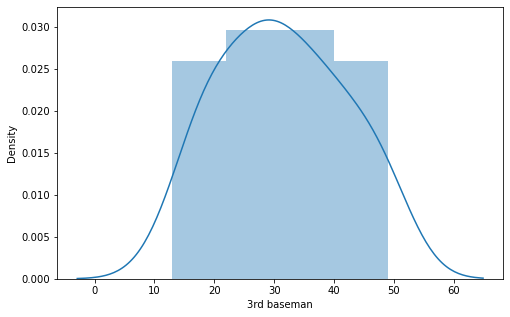

In [189]:
plt.figure(figsize=(8,5))
sns.distplot(df['3rd baseman'])

<AxesSubplot:xlabel='Homeruns', ylabel='Density'>

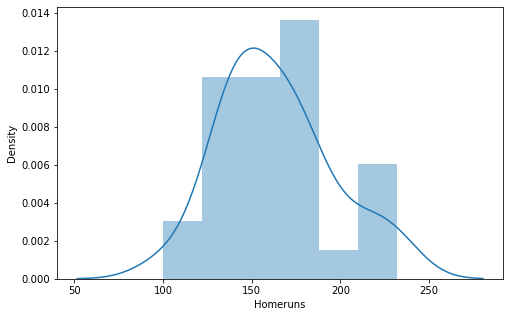

In [190]:
plt.figure(figsize=(8,5))
sns.distplot(df['Homeruns'])

<AxesSubplot:xlabel='BB-Base on balls', ylabel='Density'>

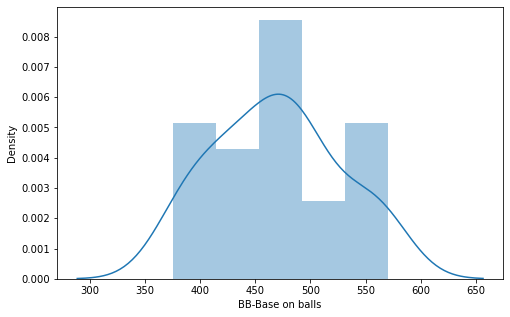

In [191]:
plt.figure(figsize=(8,5))
sns.distplot(df['BB-Base on balls'])

<AxesSubplot:xlabel='Strikeouts', ylabel='Density'>

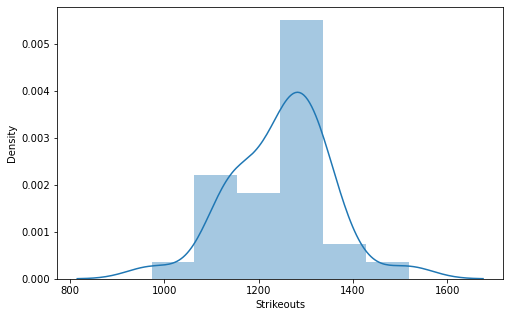

In [192]:
plt.figure(figsize=(8,5))
sns.distplot(df['Strikeouts'])

<AxesSubplot:xlabel='Stolen Bases', ylabel='Density'>

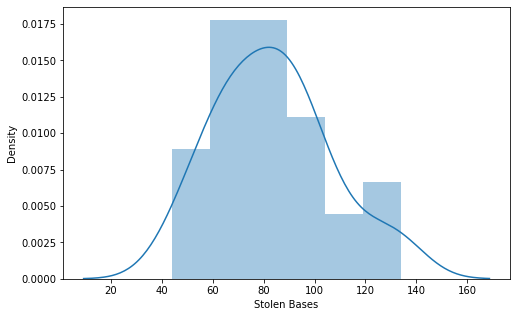

In [193]:
plt.figure(figsize=(8,5))
sns.distplot(df['Stolen Bases'])

<AxesSubplot:xlabel='Runs Allowed', ylabel='Density'>

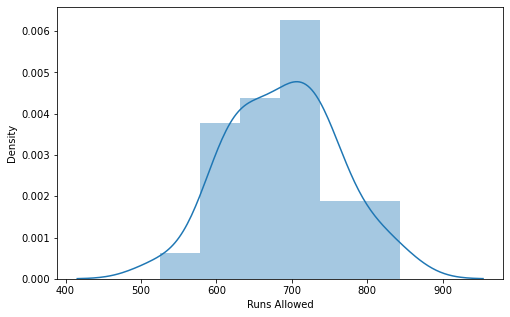

In [194]:
plt.figure(figsize=(8,5))
sns.distplot(df['Runs Allowed'])

<AxesSubplot:xlabel='Earned Runs', ylabel='Density'>

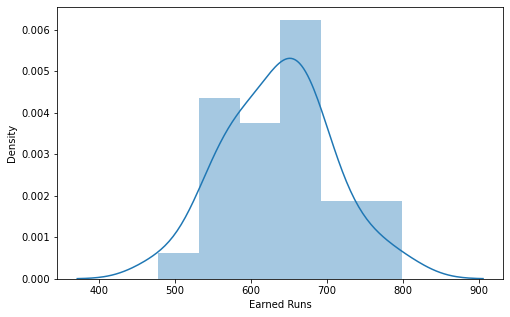

In [195]:
plt.figure(figsize=(8,5))
sns.distplot(df['Earned Runs'])

<AxesSubplot:xlabel='Earned Run Average', ylabel='Density'>

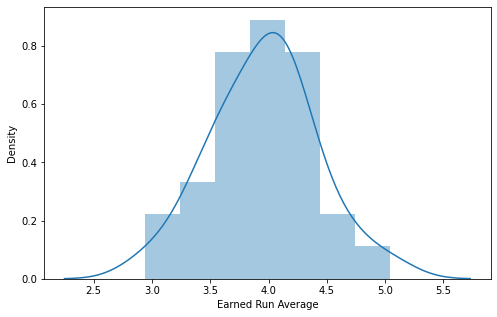

In [196]:
plt.figure(figsize=(8,5))
sns.distplot(df['Earned Run Average'])

<AxesSubplot:xlabel='Complete Games', ylabel='Density'>

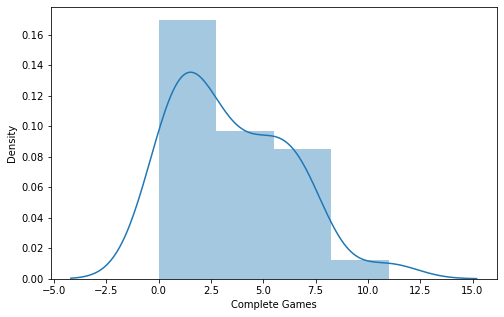

In [197]:
plt.figure(figsize=(8,5))
sns.distplot(df['Complete Games'])

<AxesSubplot:xlabel='Shutouts', ylabel='Density'>

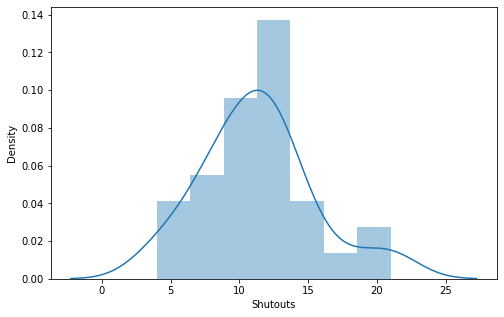

In [198]:
plt.figure(figsize=(8,5))
sns.distplot(df['Shutouts'])

<AxesSubplot:xlabel='Saves', ylabel='Density'>

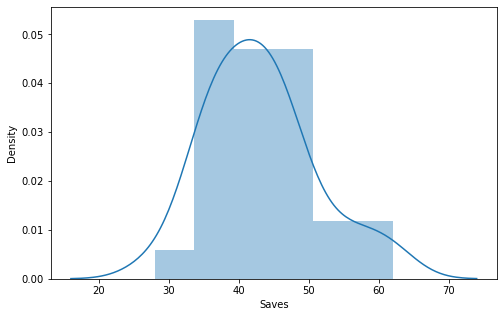

In [199]:
plt.figure(figsize=(8,5))
sns.distplot(df['Saves'])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

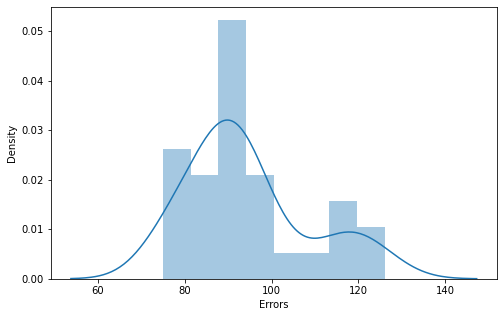

In [200]:
plt.figure(figsize=(8,5))
sns.distplot(df['Errors'])

## B. Bi-Variate analysis:

### Histogram

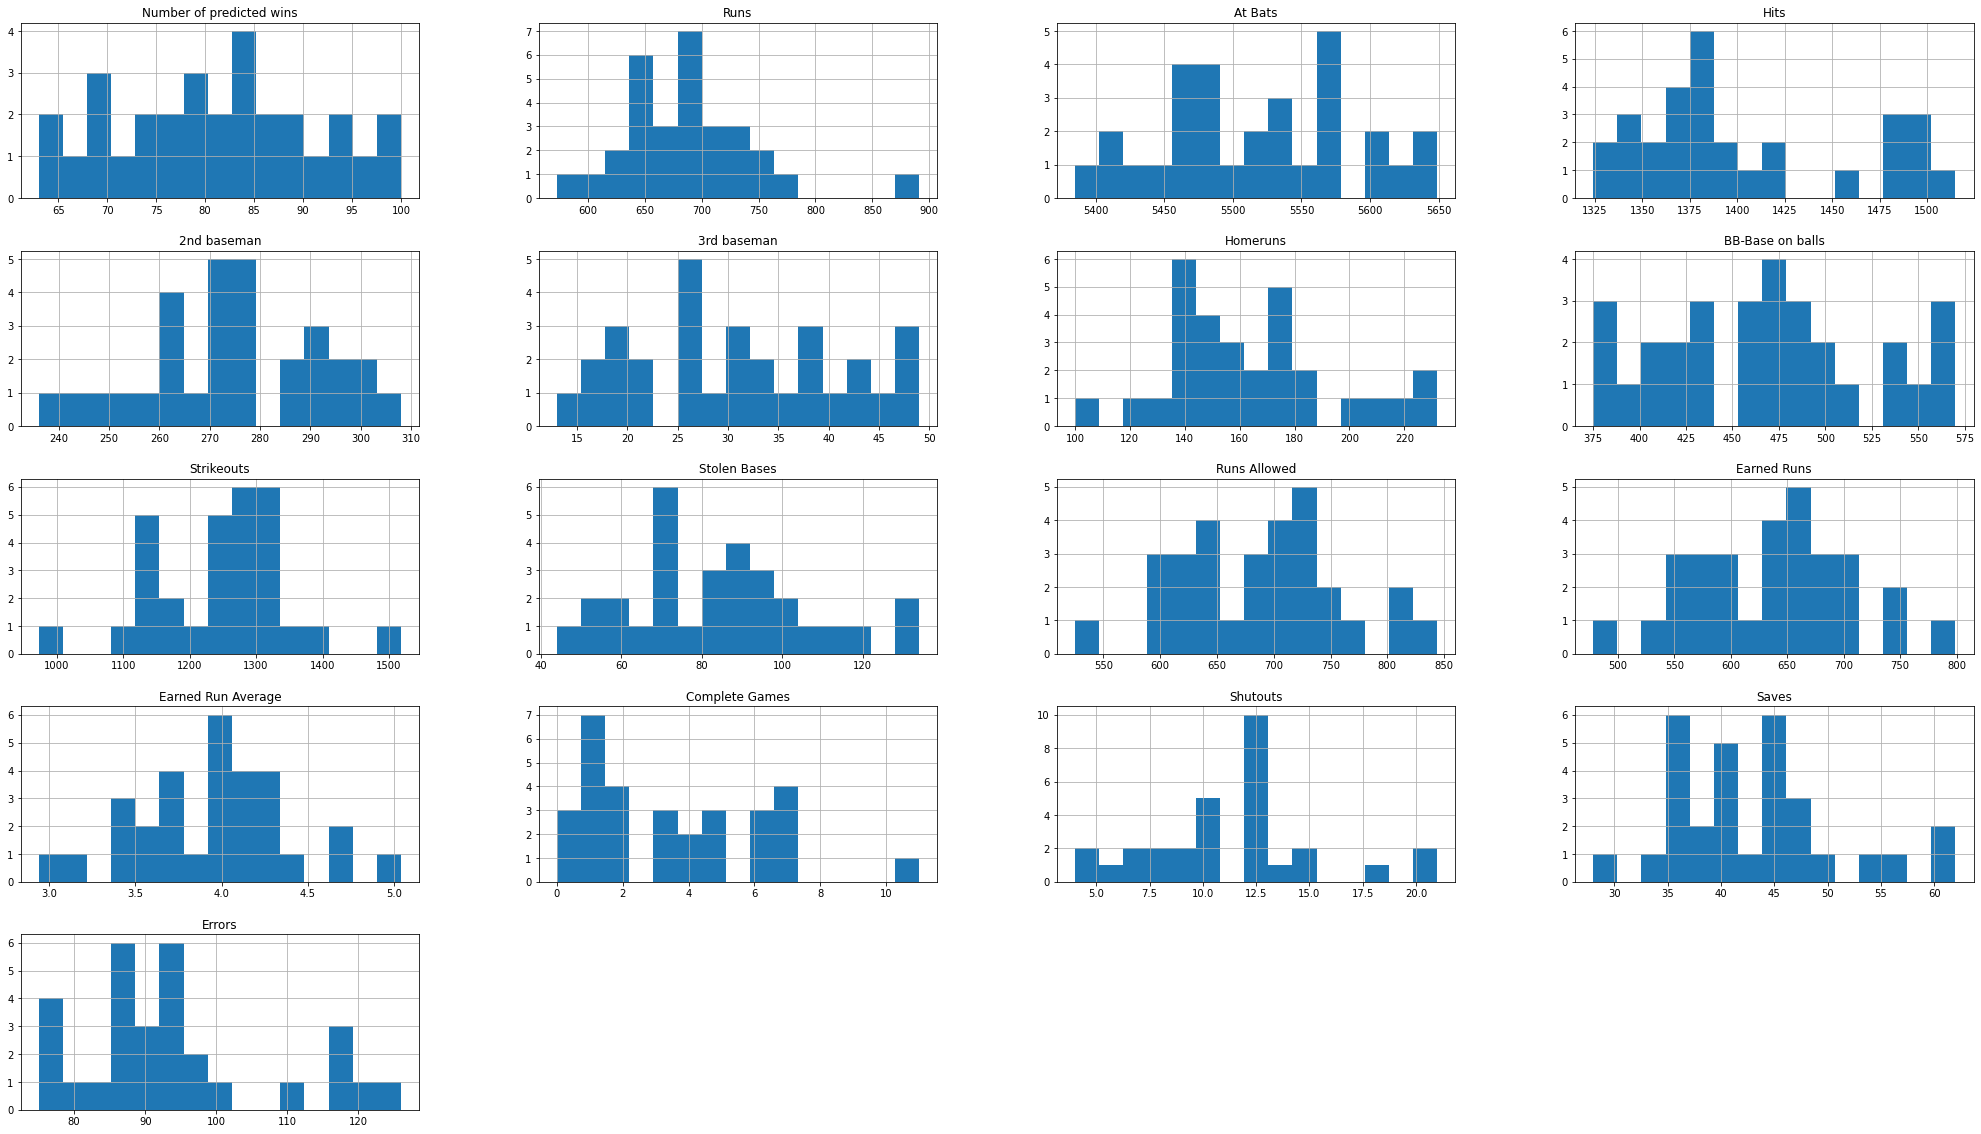

In [201]:
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

## Distribution plot- we use for continous data
### understanding relationship between features and label

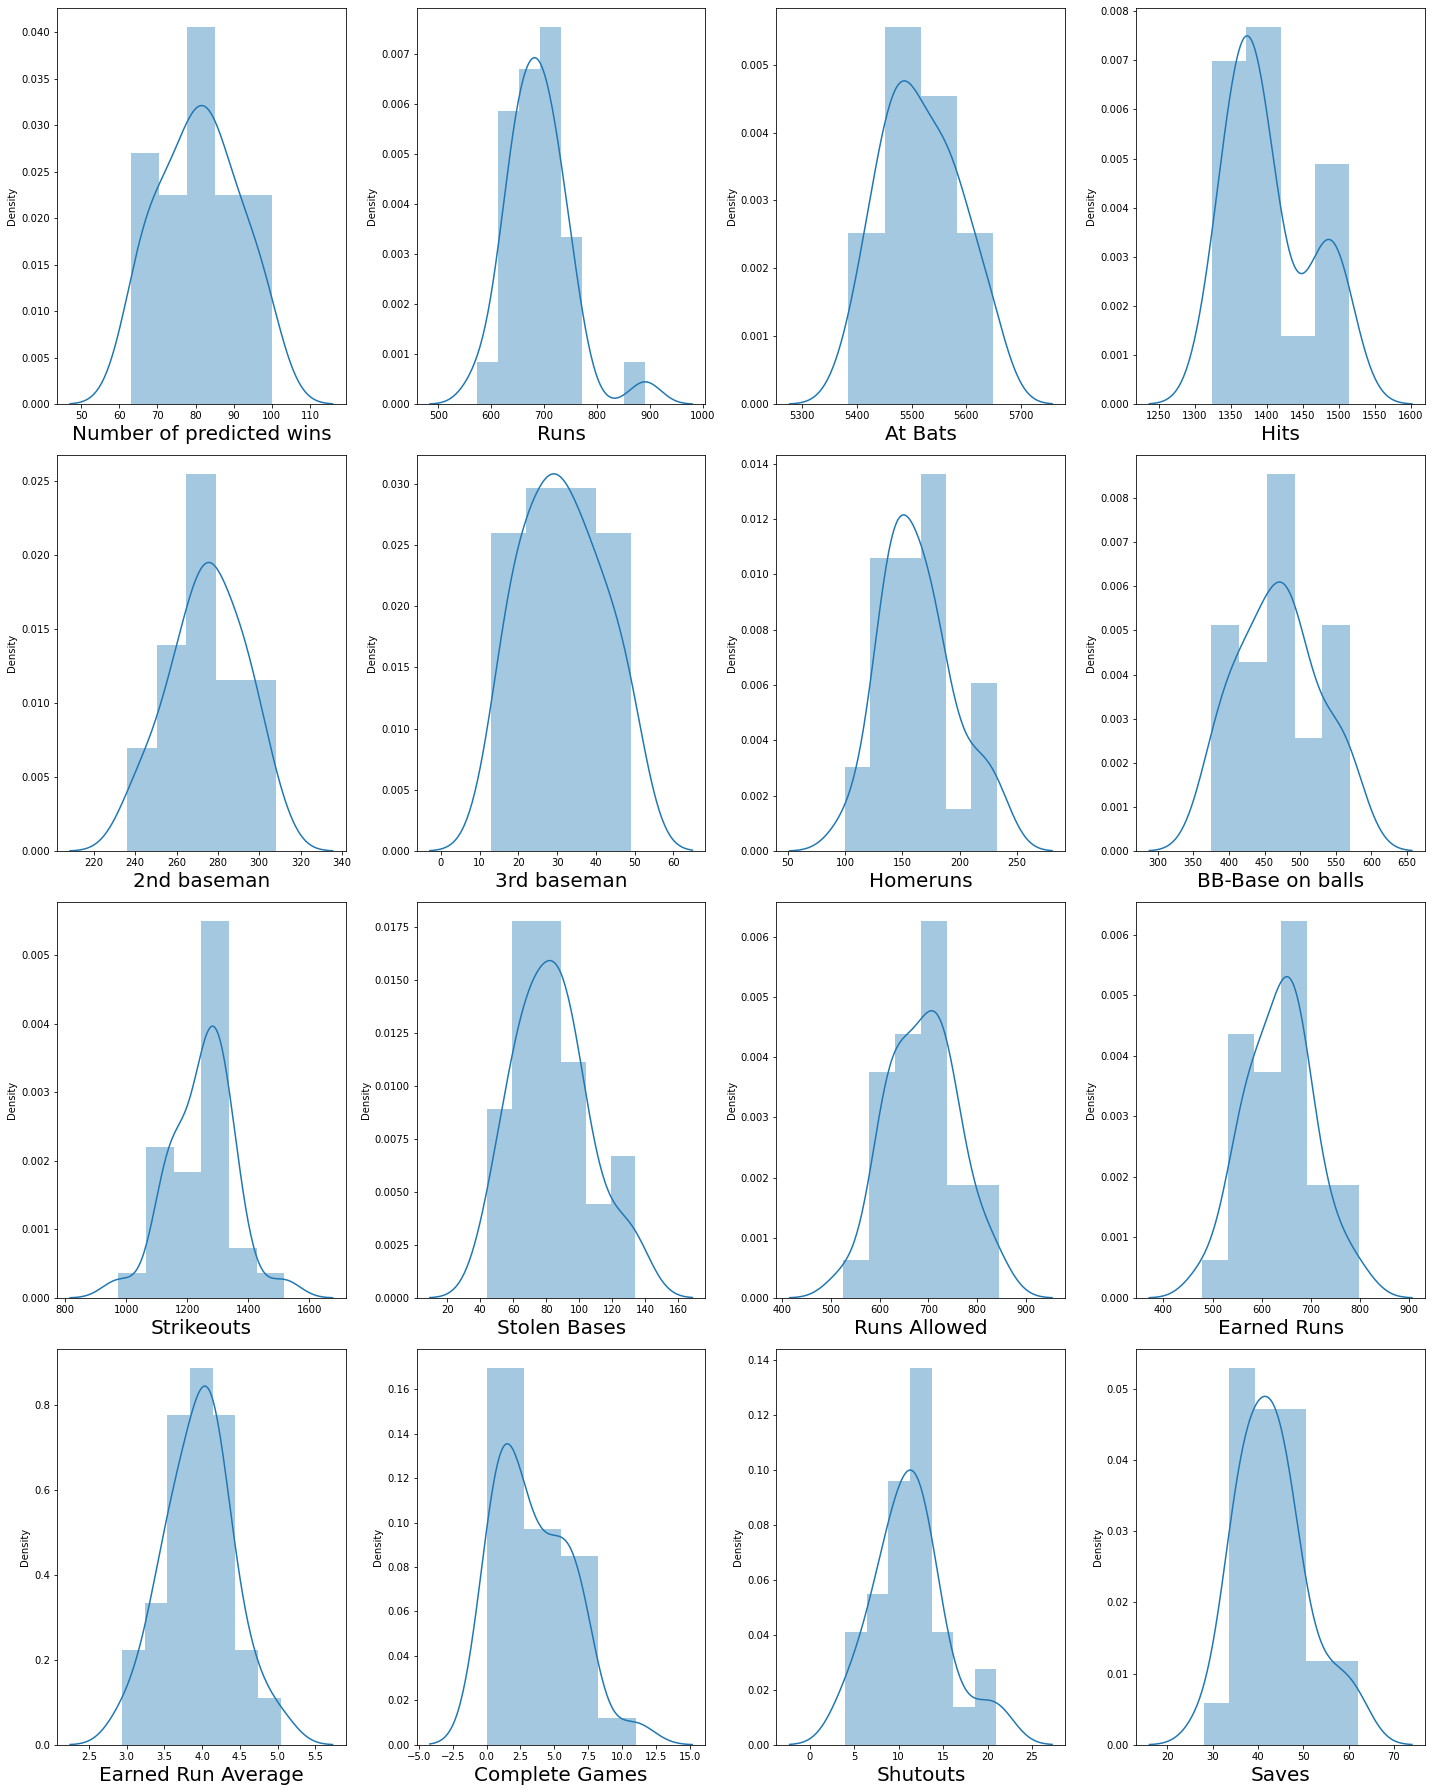

In [202]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(df[column])         
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

### Boxplot

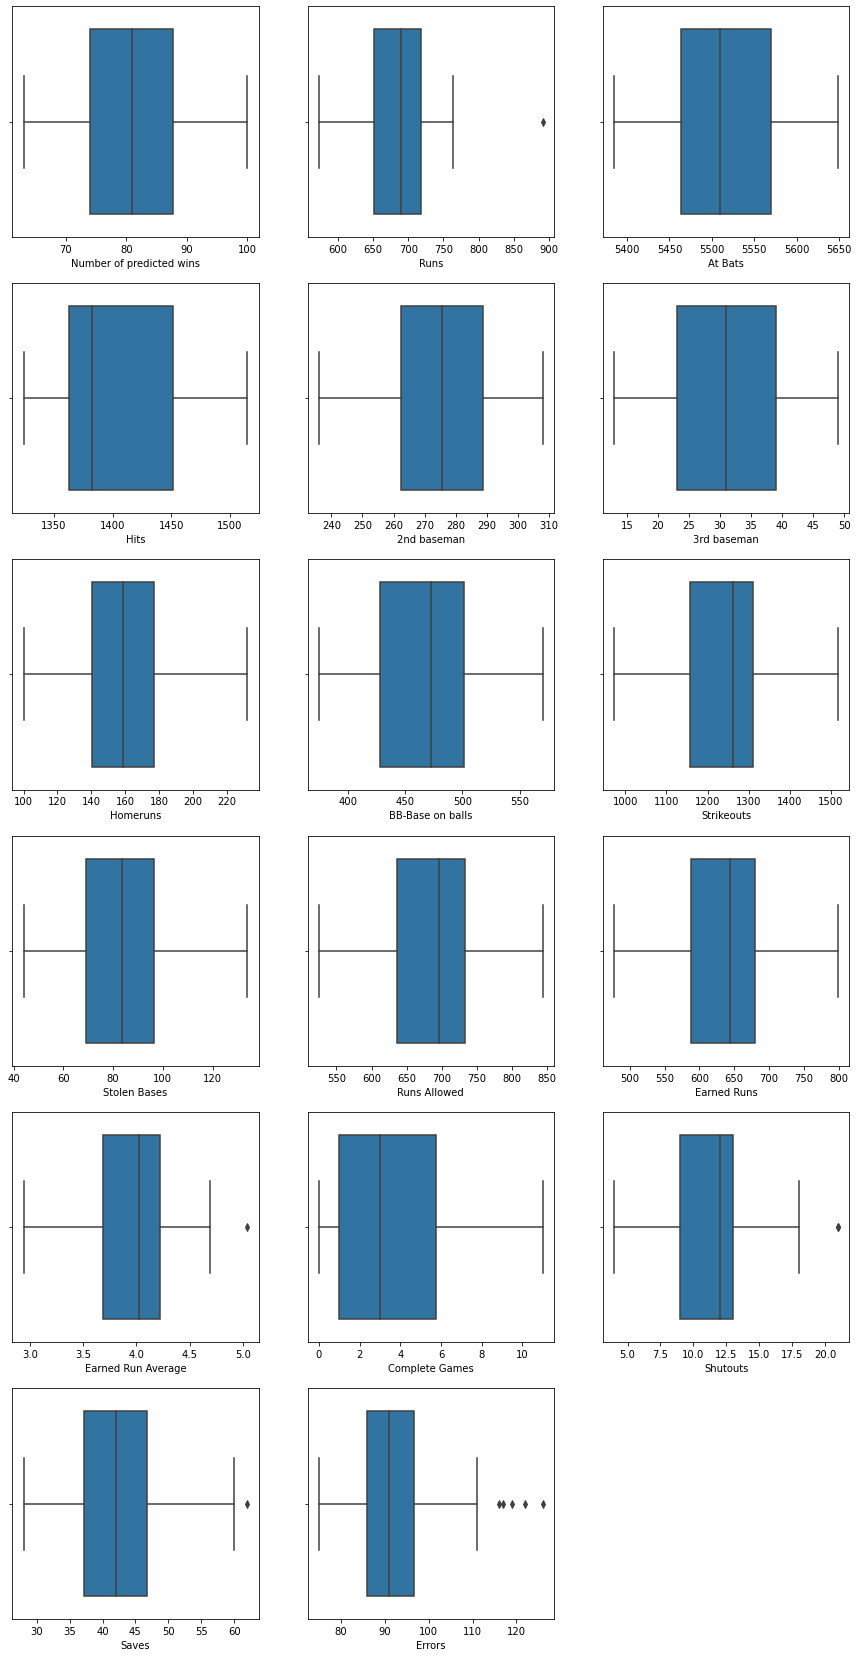

In [203]:
plt.figure(figsize=(15,50))
graph=1

for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

### Scatter plot : visualising the relationship between features and label

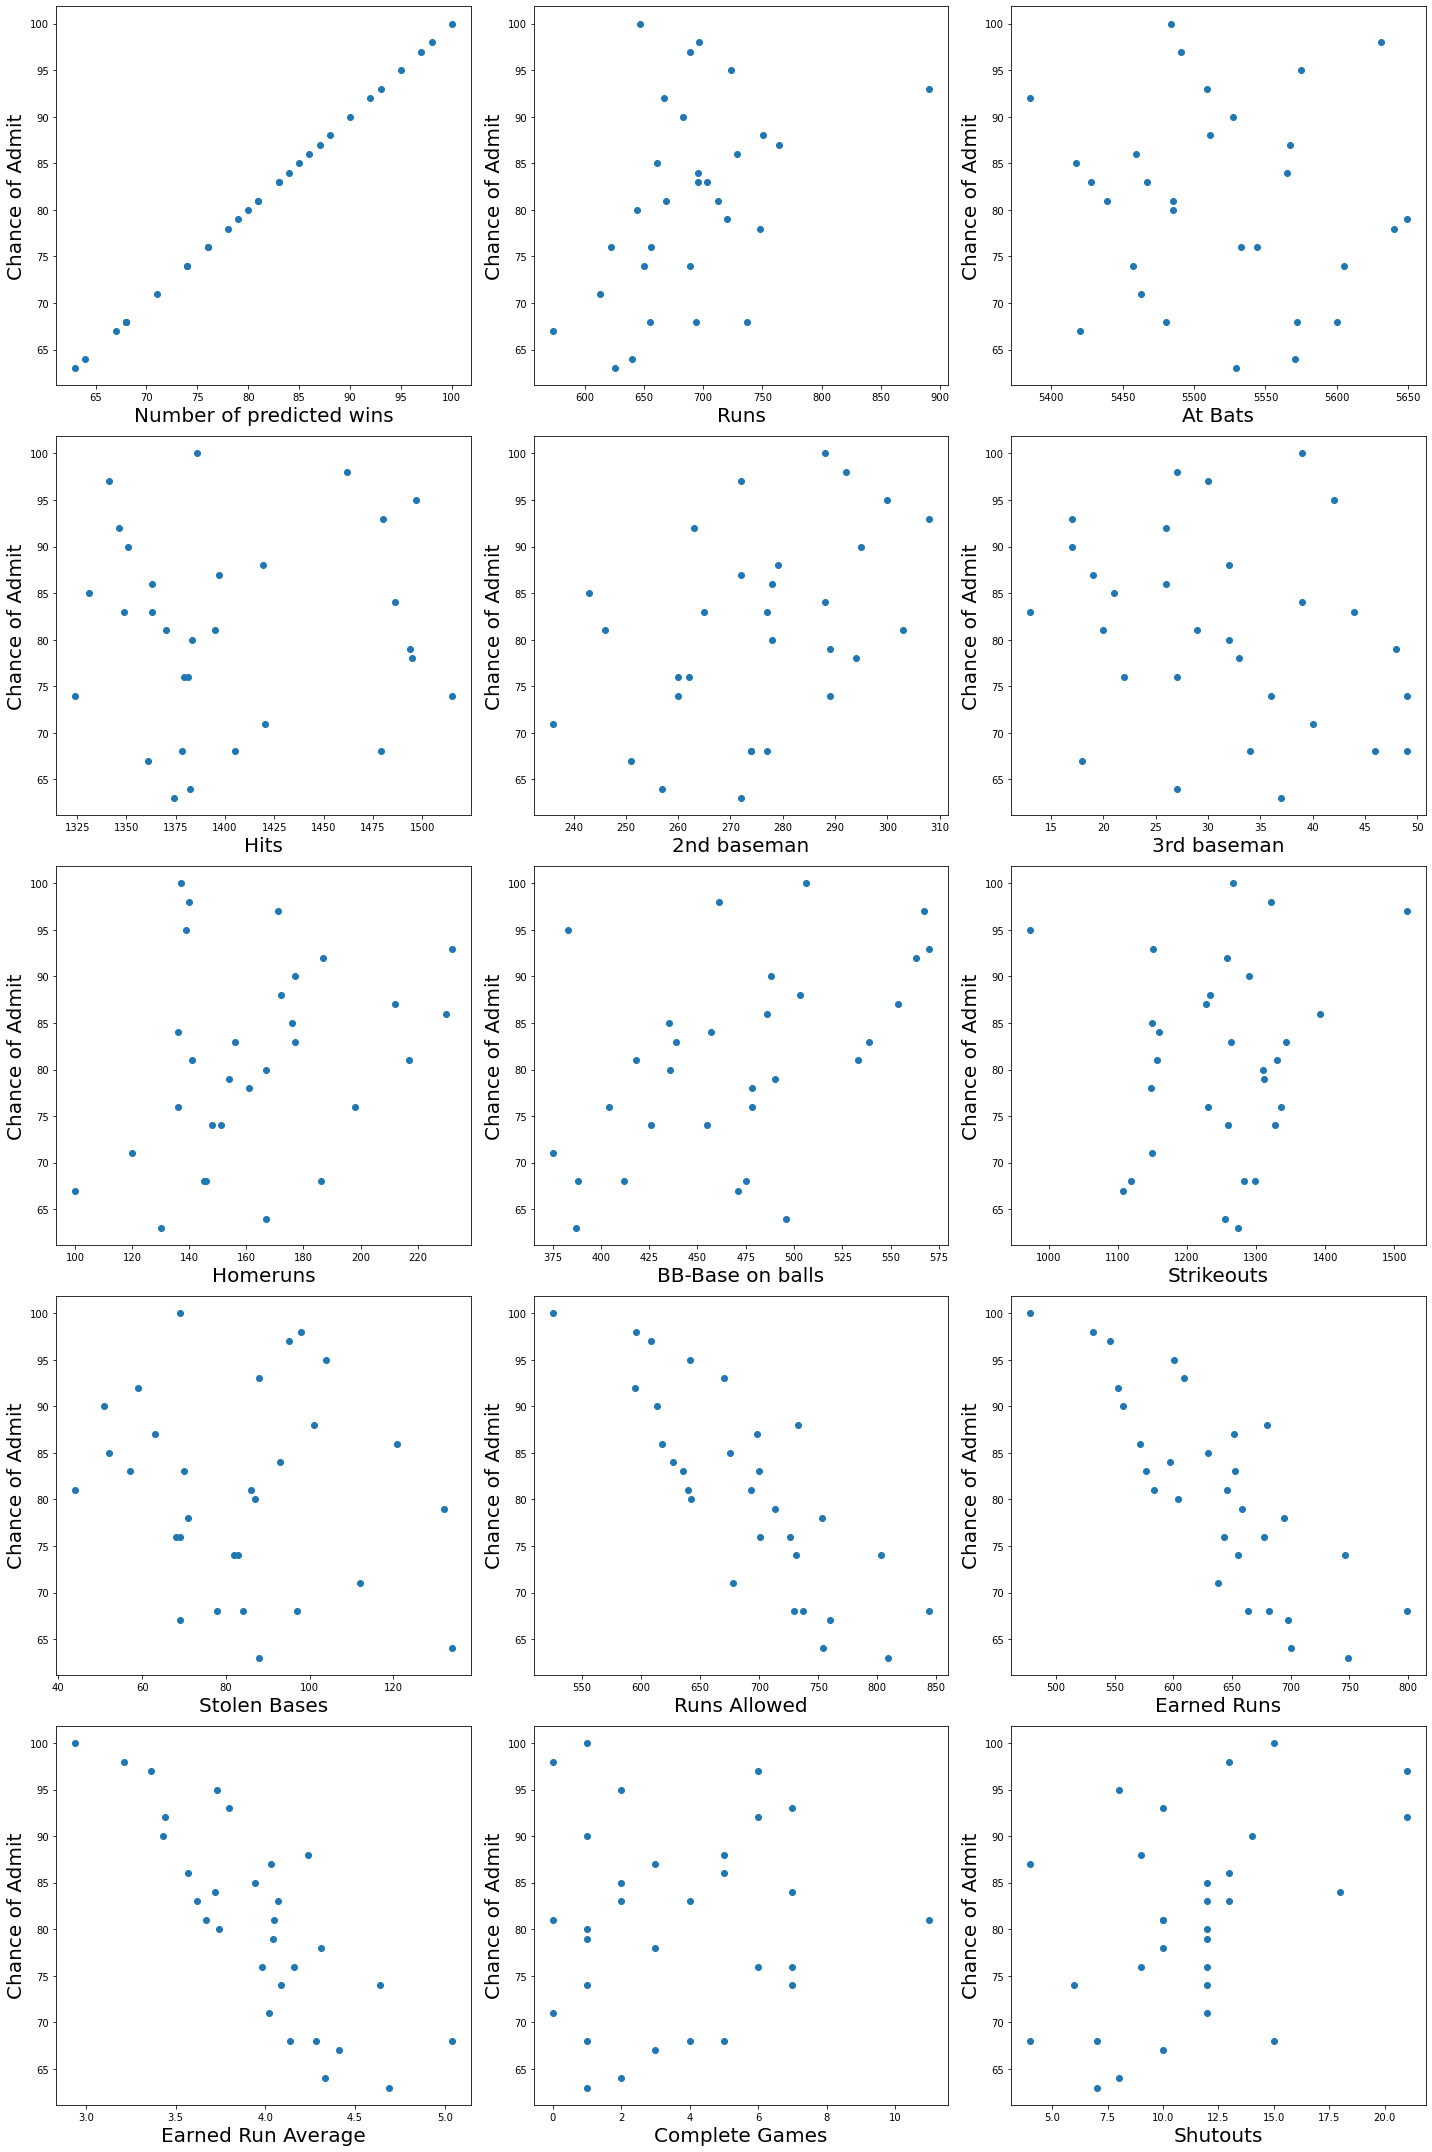

In [207]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=15:
        x=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## C. Multi-Variate analysis:

### Pairplot

<Figure size 3600x2160 with 0 Axes>

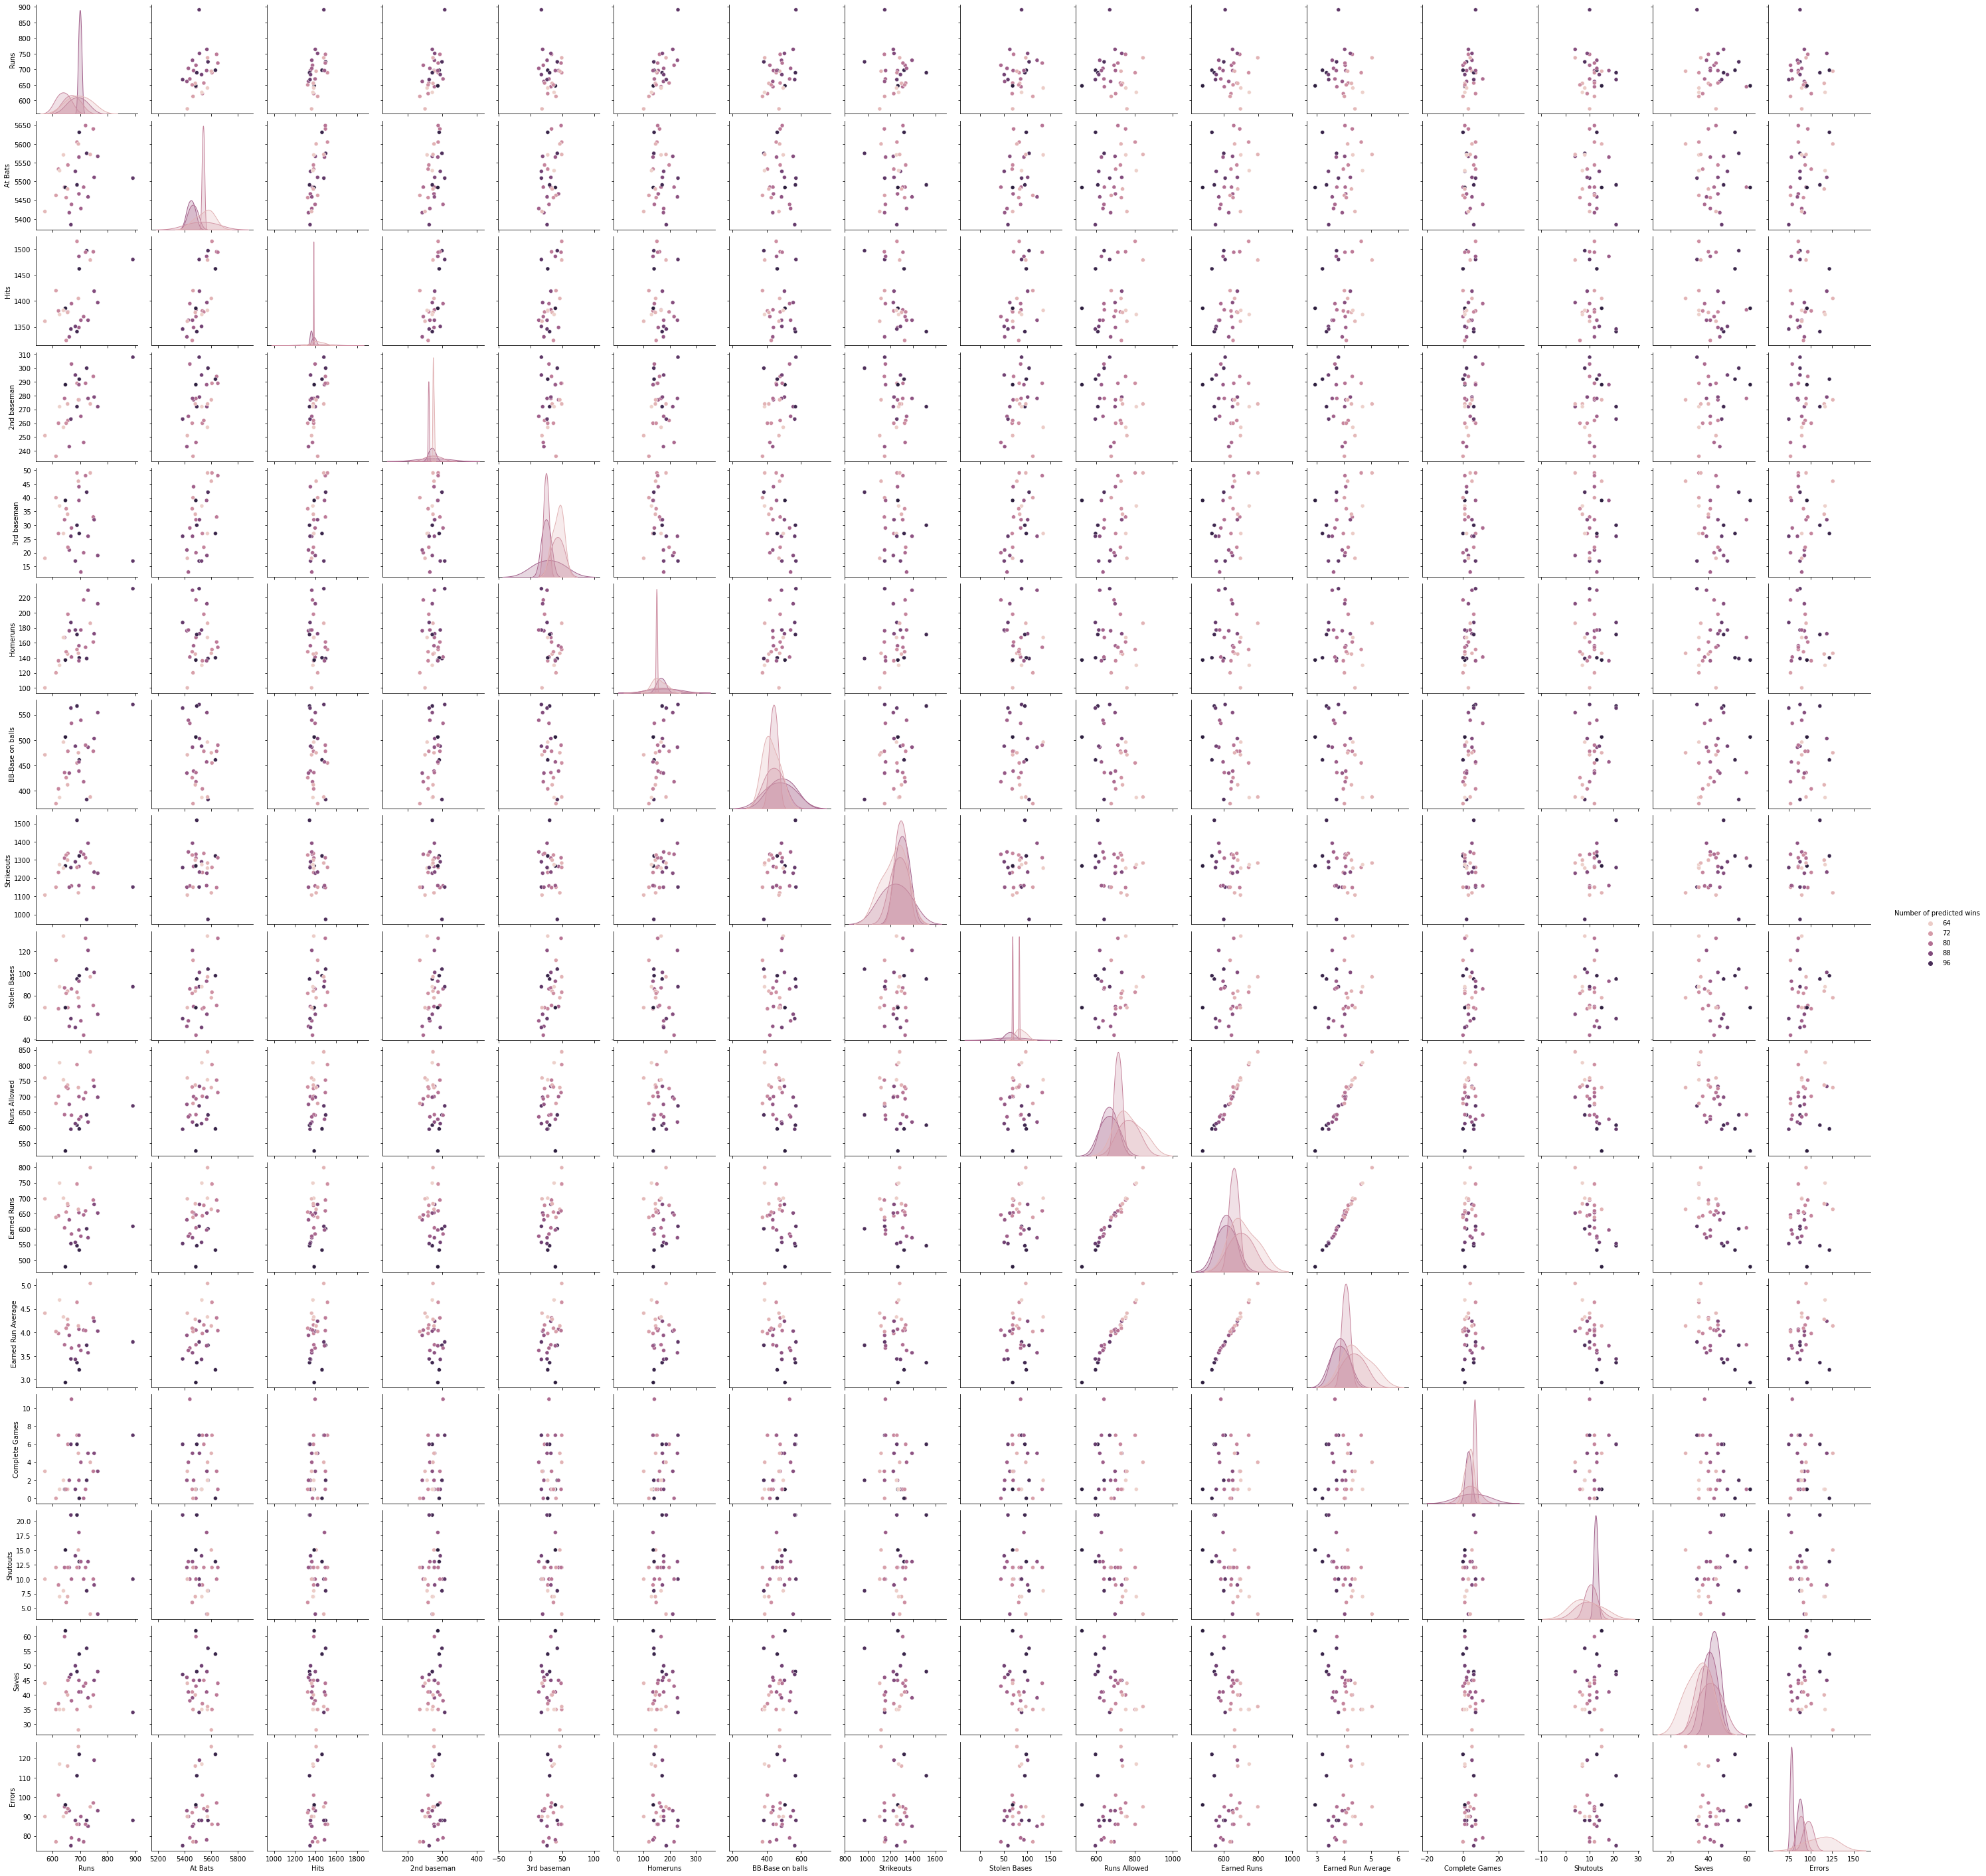

In [208]:
plt.figure(figsize=(50,30))
sns.pairplot(data=df,hue="Number of predicted wins")

# V. Handling Outliers
## Checking for outliers in the data

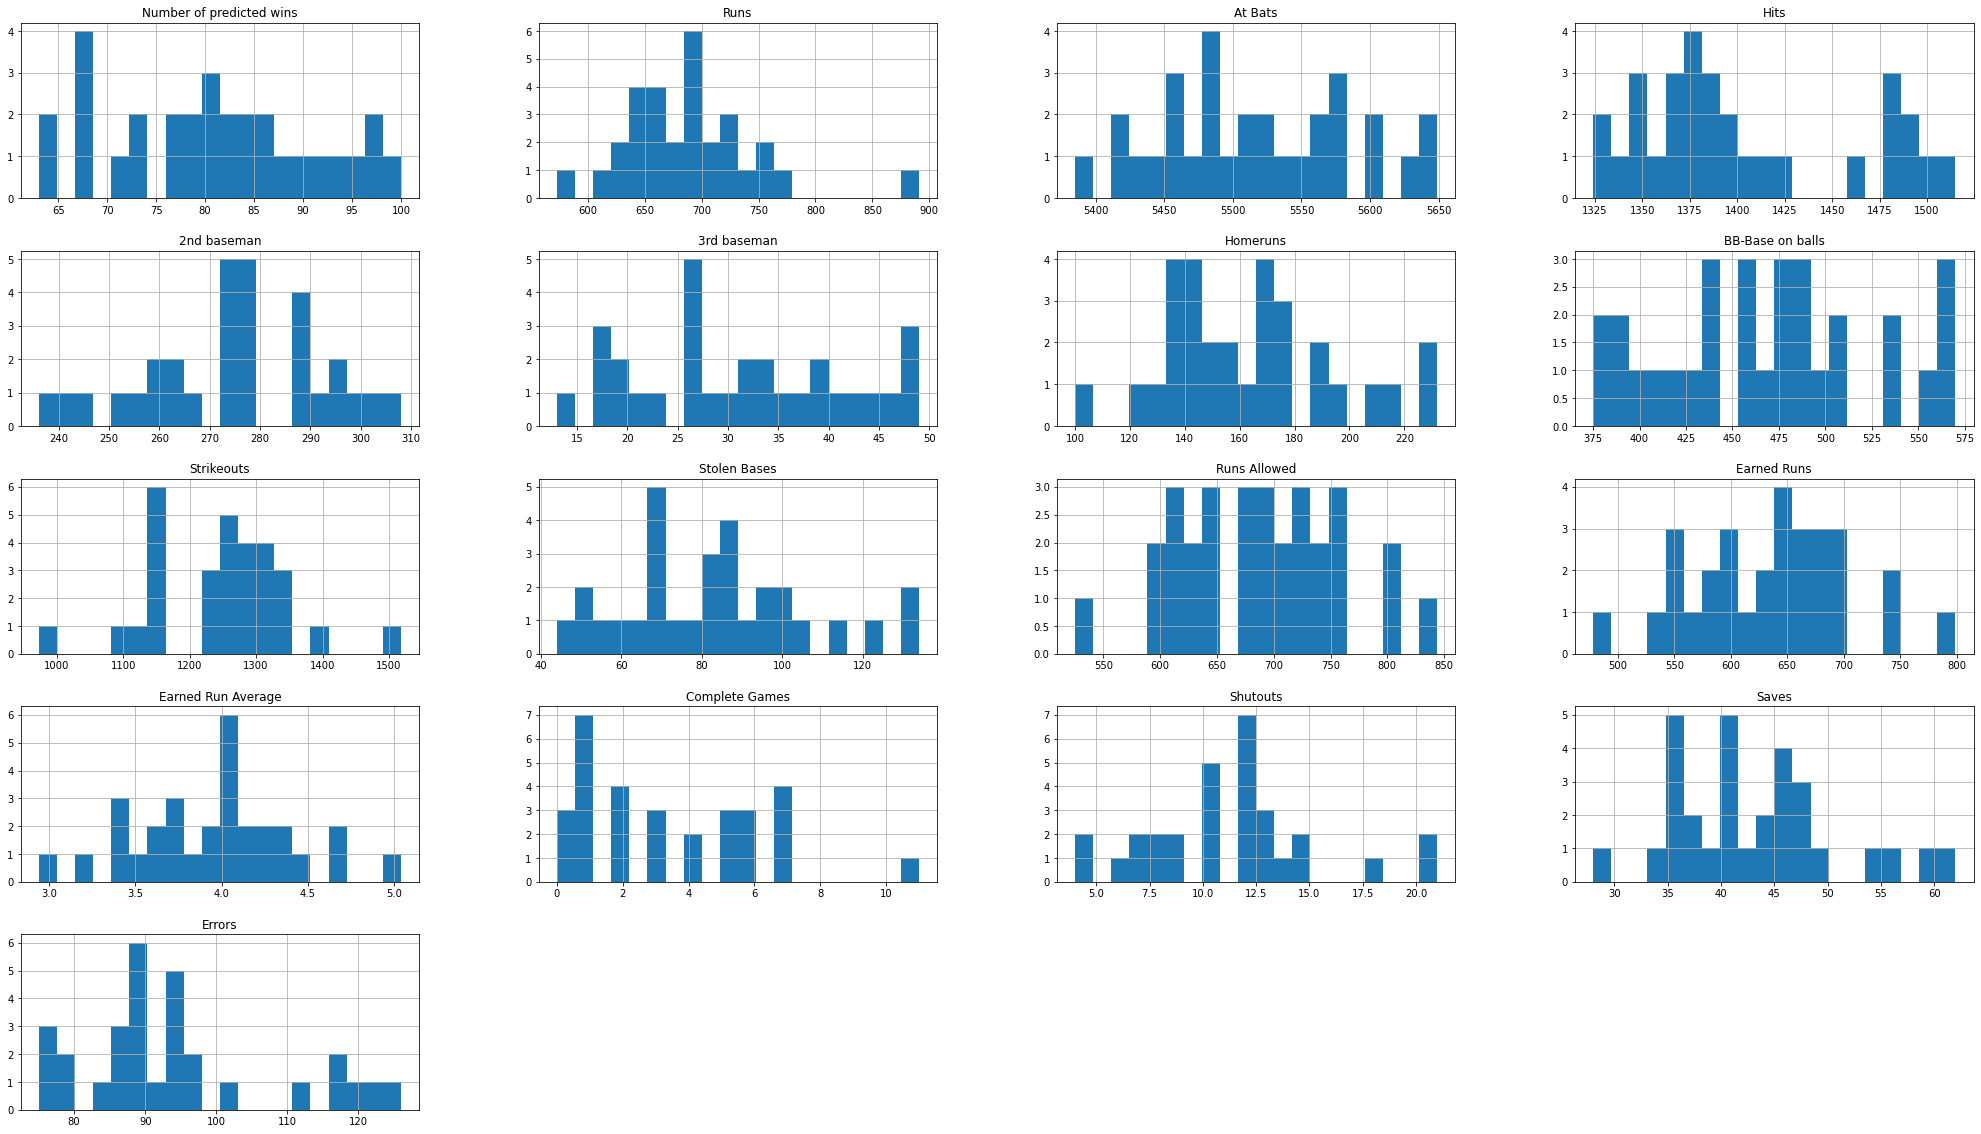

In [209]:
df.hist(figsize=(35,20),bins = 20)
plt.title("Features Distribution")
plt.show()

## Removing of Outliers from the data
### Applying z-score on X-data

In [210]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df))
print("rows after applying zscore: ",len(df_new))

rows before applying zscore:  30
rows after applying zscore:  29


In [211]:
df=df_new

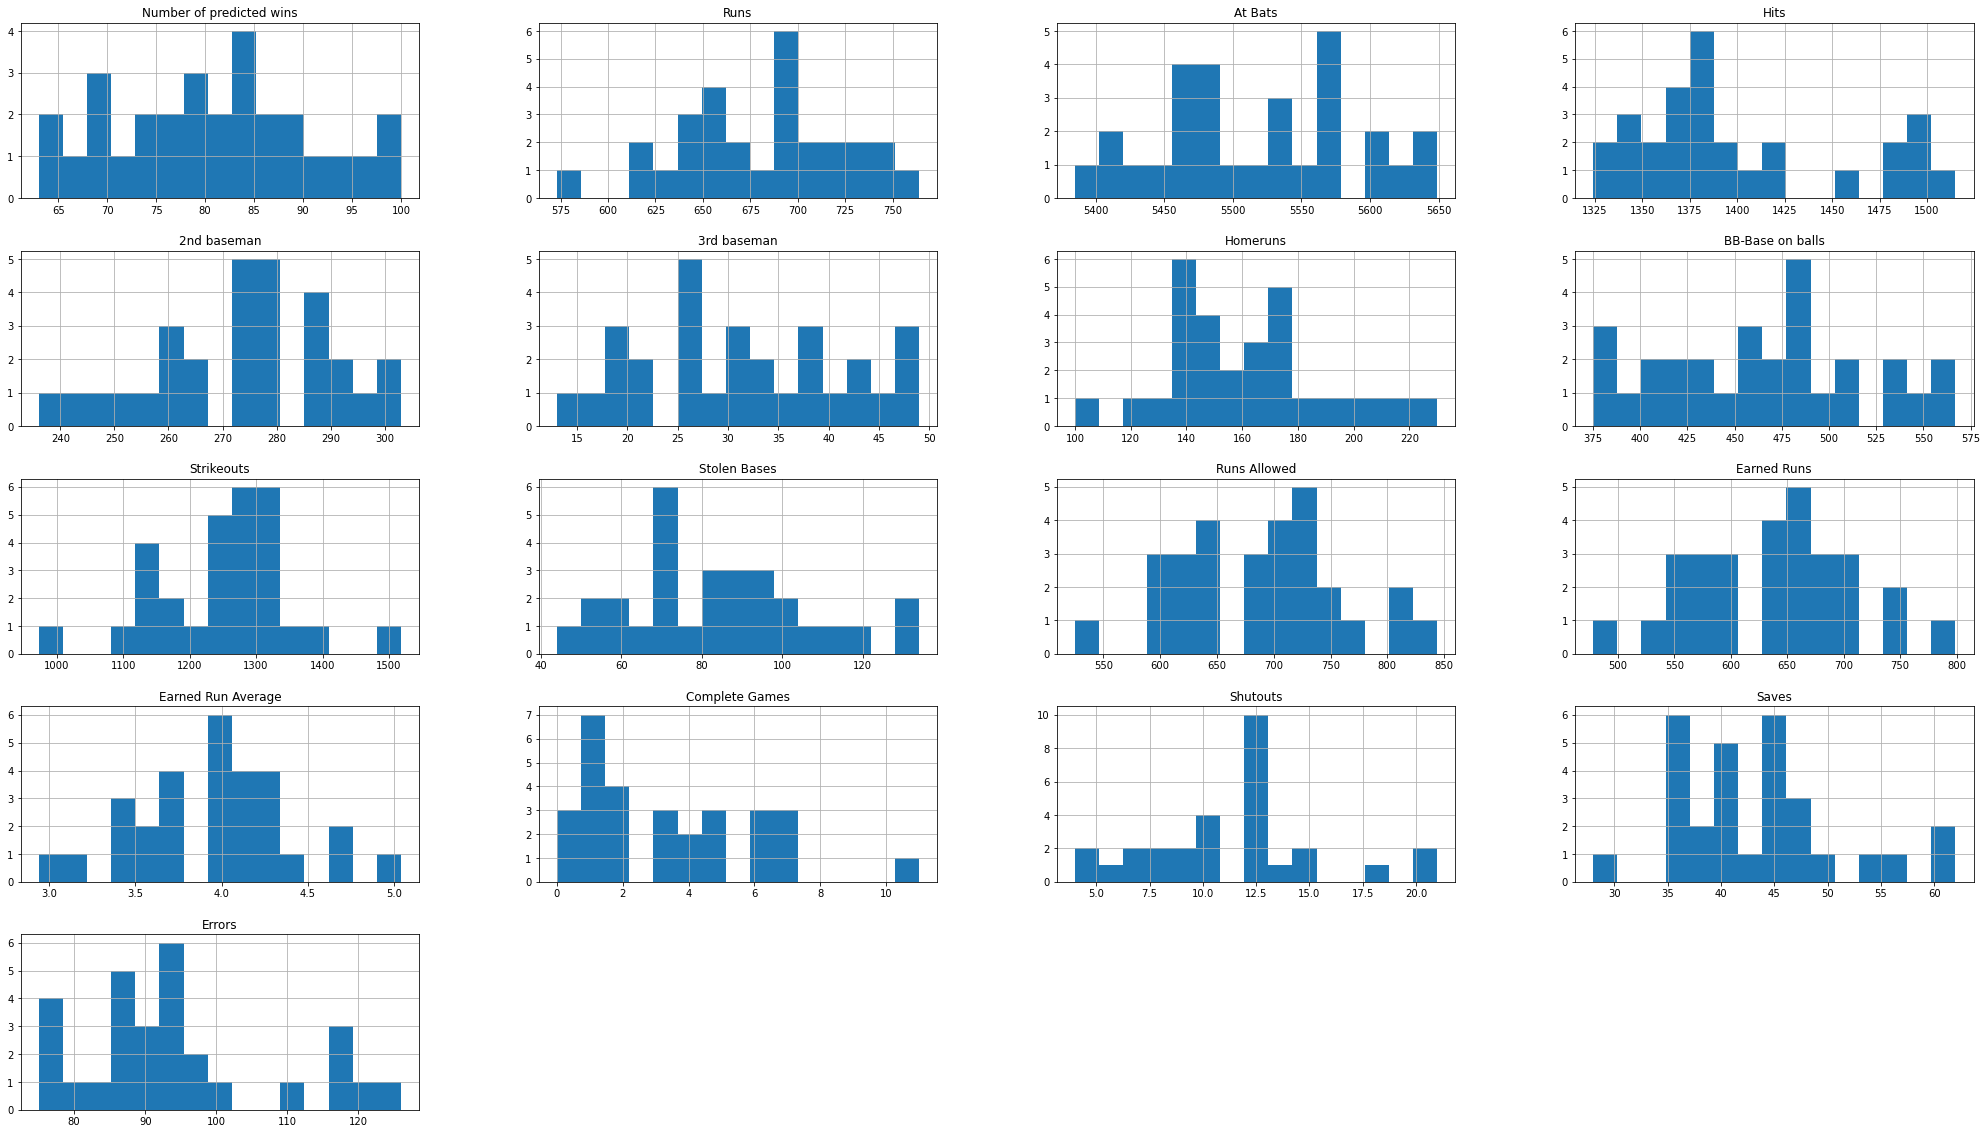

In [212]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [213]:
# reducing skewness
X.skew()

Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
2nd baseman          -0.230650
3rd baseman           0.129502
Homeruns              0.516441
BB-Base on balls      0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [214]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(X)

X_new=pd.DataFrame(df_new,columns=X.columns)

X_new.skew()

Runs                  0.000000
At Bats               0.000000
Hits                  0.000000
2nd baseman          -0.035315
3rd baseman          -0.072933
Homeruns             -0.000065
BB-Base on balls     -0.007760
Strikeouts            0.041170
Stolen Bases         -0.010455
Runs Allowed         -0.008082
Earned Runs          -0.001940
Earned Run Average    0.001746
Complete Games       -0.059785
Shutouts              0.006560
Saves                 0.000836
Errors                0.063909
dtype: float64

In [215]:
X=X_new
X=df.drop(["Number of predicted wins"],axis=1)
y=df['Number of predicted wins']


# VI. Checking for Collinearity 

## A. understanding the relationship between independent variable with label

Number of predicted wins    1.000000
Saves                       0.749290
Shutouts                    0.497526
BB-Base on balls            0.447513
Runs                        0.390451
2nd baseman                 0.384886
Homeruns                    0.245697
Strikeouts                  0.156469
Complete Games              0.029594
Hits                       -0.018360
Errors                     -0.072858
At Bats                    -0.085780
Stolen Bases               -0.169503
3rd baseman                -0.206737
Earned Runs                -0.815308
Runs Allowed               -0.823176
Earned Run Average         -0.826952
Name: Number of predicted wins, dtype: float64


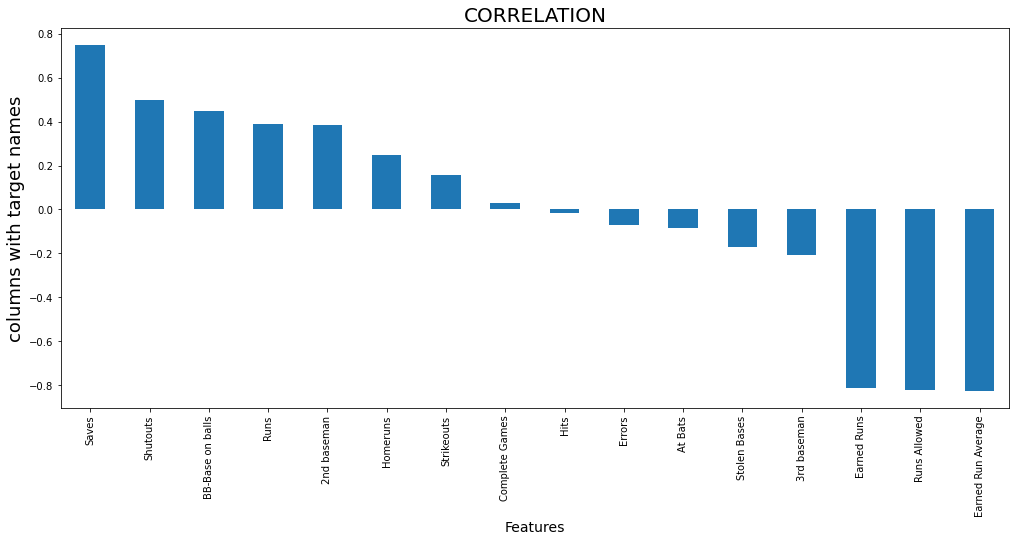

<AxesSubplot:>

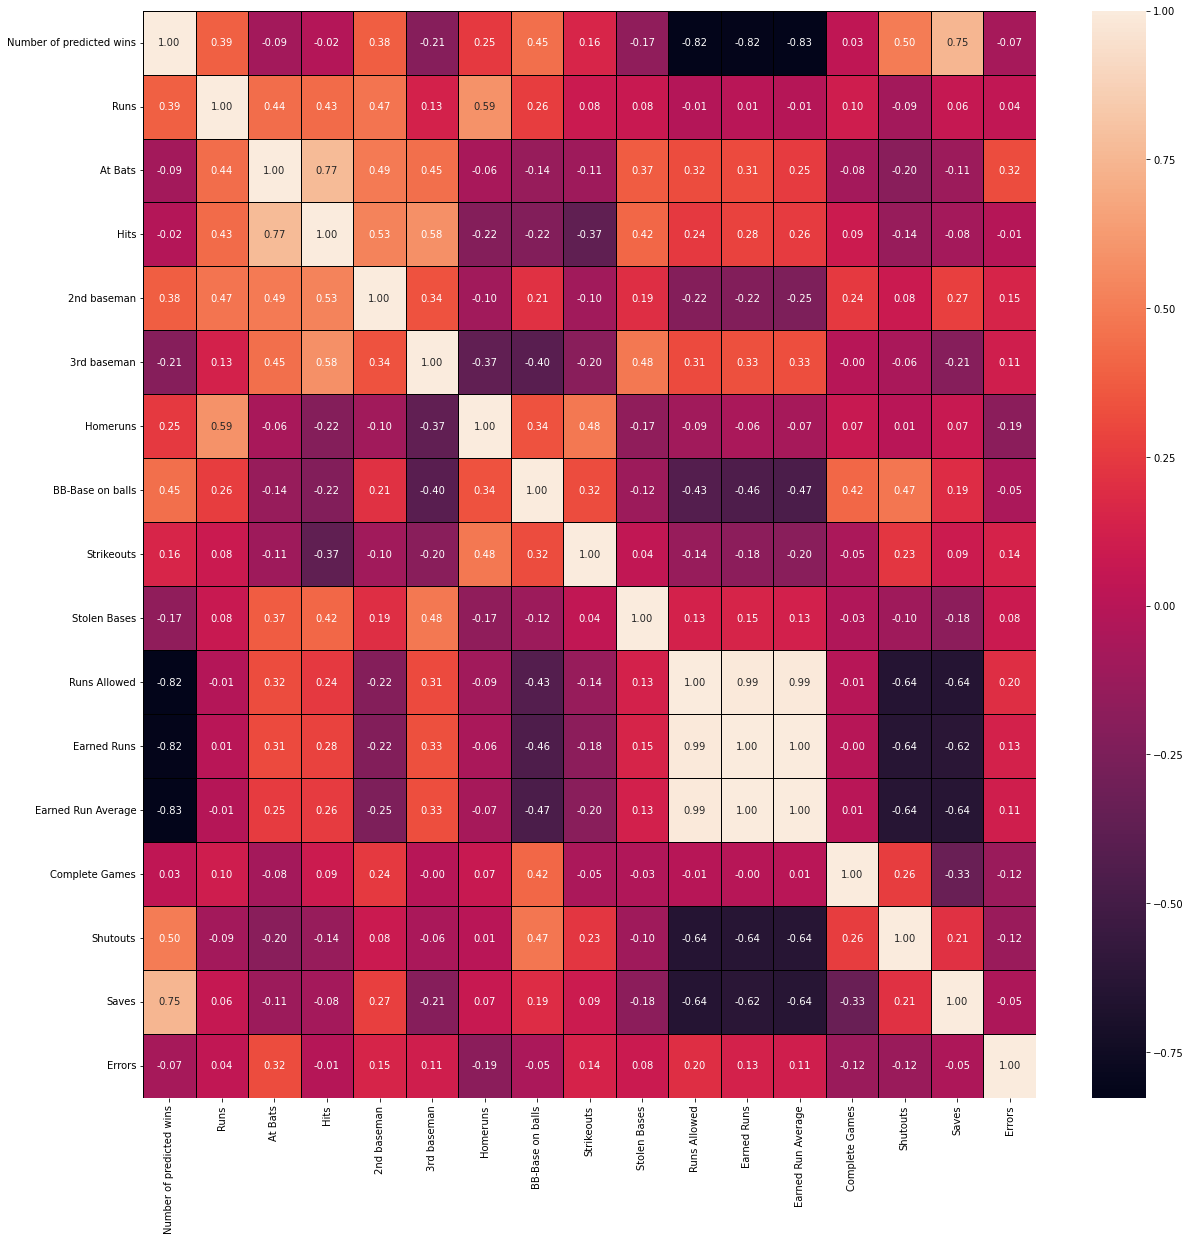

In [216]:
data_corr=df.corr()
print(data_corr["Number of predicted wins"].sort_values(ascending=False))

#checking the columns which are positively and negatively correlated
plt.figure(figsize=(17,7))
df.corr()['Number of predicted wins'].sort_values(ascending=False).drop(['Number of predicted wins']).plot(kind='bar')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

## with the help of heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')


### splitting the dataframe in predictor variables (dependent) and target variable (Independent)

In [217]:
X = df.drop(['Number of predicted wins'], axis = 1)
y = df['Number of predicted wins']

## B. Checking Multicollinearity


In [218]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["feature"]=X.columns
vif

,quality,feature
0,7.229564,Runs
1,18.333377,At Bats
2,10.558458,Hits
3,3.743423,2nd baseman
4,3.278636,3rd baseman
5,8.426403,Homeruns
6,3.431971,BB-Base on balls
7,2.720640,Strikeouts
8,2.110804,Stolen Bases
9,197.315706,Runs Allowed


**Observation :**
#### High multicollinearity is present in Earned Runs and Earned Run Average
#### So we should drop "Earned Runs" column from dataframe

In [219]:
df.drop(columns=["Earned Runs"],inplace=True)

# VII. Splitting the data into train and test

In [220]:
X_train, X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=10)

In [221]:
y_train.head()

19    64
1     83
23    67
7     81
12    85
Name: Number of predicted wins, dtype: int64

# VIII. Finding best random state

In [222]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train, X_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    predrf=LR.predict(X_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.8283412659332606 on Random State 198


# IX. Testing various models

In [223]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)  
X_scaled

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [224]:
X_train, X_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.25,random_state=198)

## Linear Regression

In [225]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.8283412659332606


## DecisionTreeClassifier

In [226]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
predlr=dt.predict(X_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.4121628154307261


## Random forest regressor

In [227]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predlr=rf.predict(X_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.6943401334235715


## cross validation Finding overfitting


In [228]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,X,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,X,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())


Cross validation score of Linear Regression model : 0.0376286604965264
Cross validation score of Decision Tree model : -2.7339513744491186
Cross validation score of Random Forest model : -0.5759049037317141


# X. selection of model
Least difference is seen in between the r2 score and the cross validation score in Linear Regression model, hence we will do hyperparamter tuning on it. 


# XI. hyperparameter tuning

In [229]:
#Linear regression model
parameters = {'fit_intercept':['True', 'False'],
               'copy_X':['True', 'False'],
              'n_jobs':[2,4,6,8,10,12],
 }

In [230]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=4)

In [231]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [2, 4, 6, 8, 10, 12]})

In [232]:
GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=2)

In [233]:
mod=LinearRegression(copy_X='True', fit_intercept='True',n_jobs=2,normalize='True')

In [234]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

# XII. Saving of model

In [235]:
#saving LinearRegression model
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(X_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

In [236]:
#Adjusted R2
LinearRegression_tree_model.score(X_train,y_train)

0.9688354012412765

In [237]:
y_pred=regression.predict(X_test)

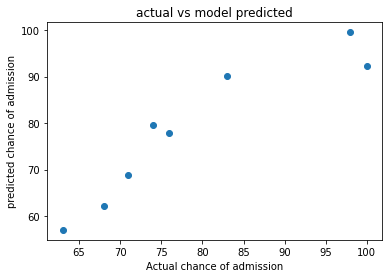

In [238]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# XIII. Prediction using the saved model

In [239]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101]]))

In [240]:
a

array([77.81431993])

# XIV. Model evaluation

In [241]:
y_predict=regression.predict(X_test)

In [242]:
mean_absolute_error(y_test,y_pred)

4.726576753680178

In [243]:
mean_squared_error(y_test,y_pred)


27.741660725816956

In [244]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.267035288074018

The mean abosolute error is 4 and mean squared error is 27 

# XV. Regularisation

In [245]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(X_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

lasso_reg.score(X_test,y_test)

0.8031245457793763

In [246]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

ridgecv.alpha_

0.09099999999999998

In [247]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

ridge_model.score(X_test,y_test)

0.817789785713687